Plots results of IMplicit-EXplicit (IMEX) example.

Institute Jozef Stefan 2022

# Import libs

In [1]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot settings

In [2]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})

# Plot IMEX indicator

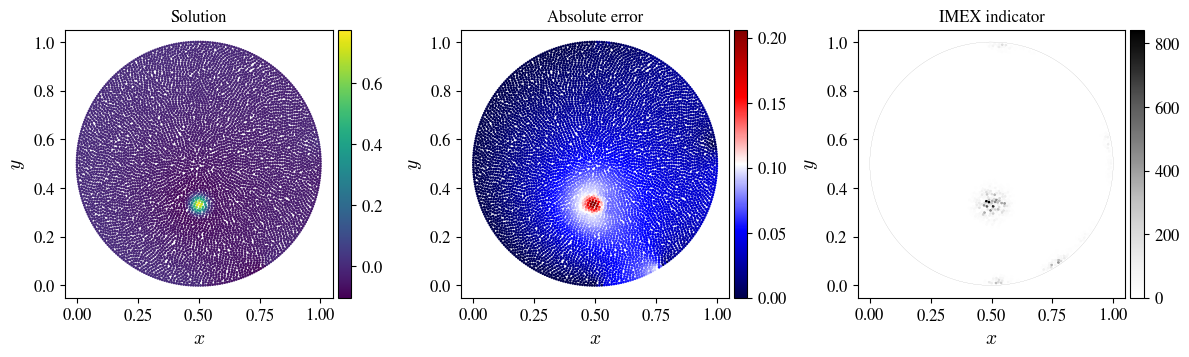

In [3]:
with h5.File('results.h5', 'r') as data:
    positions = data['domain/pos'][:]
    solution = data['solution'][:]
    error = np.abs(data['error'][:])
    indicator = np.abs(data['indicator'][:])

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Solution.
ax = axs[0]
ax.set_title('Solution')
p = ax.scatter(*positions, c=solution, s=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p, cax=cax, orientation='vertical')

# Error.
ax = axs[1]
ax.set_title('Absolute error')
p = ax.scatter(*positions, c=error, s=1, cmap='seismic')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p, cax=cax, orientation='vertical')

# Indicator.
ax = axs[2]
ax.set_title('IMEX indicator')
p = ax.scatter(*positions, c=indicator, s=1, cmap='Greys')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p, cax=cax, orientation='vertical')
# Add domain boundary to plot for clarity.
fi = np.linspace(0, 2 * np.pi, 1000)
ax.plot(0.5 * np.cos(fi) + 0.5, 0.5 * np.sin(fi) + 0.5, 'k-', lw=0.05)

# Meta settings.
for ax in axs.flatten():
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_aspect('equal')

fig.tight_layout()